In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential

train=pd.read_csv("engtamilTrain.csv")
train=train.drop(["Unnamed: 0"],axis=1)
english_sentences=train["en"]
tamil_sentence=train['ta']
english_sentences=english_sentences.head(1000)
tamil_sentences=tamil_sentence.head(1000)

In [2]:
train

,en,ta
0,MMA vice president Qazi Hussain Ahmad declared...,MMA கட்சியின் துணைத்தலைவர் க்வாஸி ஹுசேன் அகமத்...
1,Information has surfaced in recent years sugge...,சமீபகாலத்தில் சில தகவல்கள் யூலியஸ் ரோசன்பேர்க...
2,And Azor begat Sadoc; and Sadoc begat Achim; a...,ஆசோர் சாதோக்கைப் பெற்றான்; சாதோக்கு ஆகீமைப் பெ...
3,"She says she knows what is going on, but can d...",என்ன நடக்கிறது என்பது தமக்கு தெரியும் என்றும் ...
4,"And be it indeed that I have erred, my error r...","நான் தப்பிநடந்தது மெய்யானாலும், என் தப்பிதம் எ..."
...,...,...
166866,"Soon to be released, 'Silandhi' is produced by...",விரைவில் திரைக்கு வர இருக்கும் 'சிலந்தி' படத்த...
166867,"An MHP deputy publicly stated, ""Let them die.""\n",தேசியவாத இயக்கங்களின் கட்சி (MHP) யின் உபதலைவர...
166868,And Aaron shall make an atonement on the horns...,வருஷத்தில் ஒருமுறை ஆரோன் பாவநிவாரணபலியின் இரத்...
166869,"Like the CWC, the UPF is part of the governmen...","இ.தொ.கா. போலவே, மலையக மக்கள் முன்னணியும் அரச..."


In [3]:
english_sentences

0      MMA vice president Qazi Hussain Ahmad declared...
1      Information has surfaced in recent years sugge...
2      And Azor begat Sadoc; and Sadoc begat Achim; a...
3      She says she knows what is going on, but can d...
4      And be it indeed that I have erred, my error r...
                             ...                        
995    A face that stays on in people's mind is impor...
996    According to a report distributed by the Pales...
997    In a fundraising letter to big contributors, B...
998    It is entirely appropriate that outraged prote...
999    Against him there exists nothing, and he knows...
Name: en, Length: 1000, dtype: object

In [4]:
tamil_sentences

0      MMA கட்சியின் துணைத்தலைவர் க்வாஸி ஹுசேன் அகமத்...
1      சமீபகாலத்தில் சில தகவல்கள் யூலியஸ் ரோசன்பேர்க...
2      ஆசோர் சாதோக்கைப் பெற்றான்; சாதோக்கு ஆகீமைப் பெ...
3      என்ன நடக்கிறது என்பது தமக்கு தெரியும் என்றும் ...
4      நான் தப்பிநடந்தது மெய்யானாலும், என் தப்பிதம் எ...
                             ...                        
995    ஒரு நடிகருக்கோ, நடிகைக்கோ மனதில் பதியக்கூடிய ம...
996    ஒரு அகதி முகாமின் ஒரு தெருவில் 30 பேர் கொல்லப...
997    புஷ் பிரச்சார பொது வக்கீலான Tom Josejiak விடு...
998    ஆத்திரம் கொண்ட ஆர்ப்பாட்டக்காரர்கள் CNN, A.B....
999    அவருக்கு எதிராக ஒன்றும் இல்லை; அதை அவர் நன்கு ...
Name: ta, Length: 1000, dtype: object

In [5]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [6]:
def sentToken(sentence):
        # define your dataset
    dataset = sentence

    # convert each sentence to a list of words
    sentences = [sentence.split() for sentence in dataset]

    # print the result
    print(sentences)
    
    return sentences


In [7]:
engSentence=sentToken(english_sentences)

[['MMA', 'vice', 'president', 'Qazi', 'Hussain', 'Ahmad', 'declared', 'last', 'month:', "'We", 'are', 'not', 'extremists.'], ['Information', 'has', 'surfaced', 'in', 'recent', 'years', 'suggesting', 'that', 'Julius', 'Rosenberg', 'was', 'involved', 'in', 'passing', 'some', 'form', 'of', 'intelligence', 'to', 'Soviet', 'officials', 'during', 'the', 'Second', 'World', 'War.'], ['And', 'Azor', 'begat', 'Sadoc;', 'and', 'Sadoc', 'begat', 'Achim;', 'and', 'Achim', 'begat', 'Eliud;'], ['She', 'says', 'she', 'knows', 'what', 'is', 'going', 'on,', 'but', 'can', 'do', 'nothing', 'about', 'it.'], ['And', 'be', 'it', 'indeed', 'that', 'I', 'have', 'erred,', 'my', 'error', 'remains', 'with', 'myself.'], ['Finally,', 'the', 'columnist', 'fails', 'to', 'tell', 'us', 'who', 'among', 'the', 'political', 'leaders', 'of', 'the', 'bourgeoisie,', 'past', 'and', 'present,', 'he', 'counts', 'among', 'the', 'paragons', 'of', 'morality.'], ['These', 'include', 'the', 'British', 'Tamil', 'Forum,', 'La', 'Maiso

In [8]:
tamSentence=sentToken(tamil_sentences)

[['MMA', 'கட்சியின்', 'துணைத்தலைவர்', 'க்வாஸி', 'ஹுசேன்', 'அகமத்', 'சென்ற', 'மாதம்', 'பின்வருமாறு', 'அறிவித்தார்:', '``நாங்கள்', 'தீவிரவாதிகள்', 'அல்ல.'], ['சமீபகாலத்தில்', 'சில', 'தகவல்கள்', 'யூலியஸ்', 'ரோசன்பேர்க்', 'ஒரு', 'வித', 'உளவுச்செய்தியை', 'சோவியத்', 'அதிகாரிகளுக்கு', 'இரண்டாம்', 'உலகப்போரின்போது', 'அனுப்பியதில்', 'சம்பந்தப்பட்டு', 'இருந்ததாக', 'வெளிவந்துள்ளன.'], ['ஆசோர்', 'சாதோக்கைப்', 'பெற்றான்;', 'சாதோக்கு', 'ஆகீமைப்', 'பெற்றான்;', 'ஆகீம்', 'எலியூதைப்', 'பெற்றான்;'], ['என்ன', 'நடக்கிறது', 'என்பது', 'தமக்கு', 'தெரியும்', 'என்றும்', 'ஆனால்,', 'தம்மால்', 'எதுவும்', 'செய்யமுடியாது', 'என்றும்', 'கடிதம்', 'எழுதியிருந்தார்.'], ['நான்', 'தப்பிநடந்தது', 'மெய்யானாலும்,', 'என்', 'தப்பிதம்', 'என்னோடேதான்', 'இருக்கிறது'], ['டால்ரிம்பிளினுடைய', 'அறிவுஜீவித்', 'தொடுவானத்திற்கு', 'அப்பால்', 'எவ்வளவோ', 'தொலைவில்', 'இருந்தன'], ['இந்த', 'அமைப்புக்களில்', 'British', 'Tamil', 'Forum,', 'La', 'Maison', 'du', 'Tamil', 'Eelam', '(France),', 'the', 'Canadian', 'Tamil', 'Congress,', 'Swiss',

In [ ]:
#https://radimrehurek.com/gensim_3.8.3/models/word2vec.html
#https://radimrehurek.com/gensim/models/word2vec.html

In [9]:
def ownWordModel(langsentence,modelname):
    from gensim.models import Word2Vec
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt
    model = Word2Vec(langsentence, min_count=1)
    print(model)
    # save model
    model.save(modelname)
    # fit a 2d PCA model to the vectors
    X = model.wv.vectors  # corrected line
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)

    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    words = list(model.wv.index_to_key)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.show()


Word2Vec<vocab=7300, vector_size=100, alpha=0.025>


C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


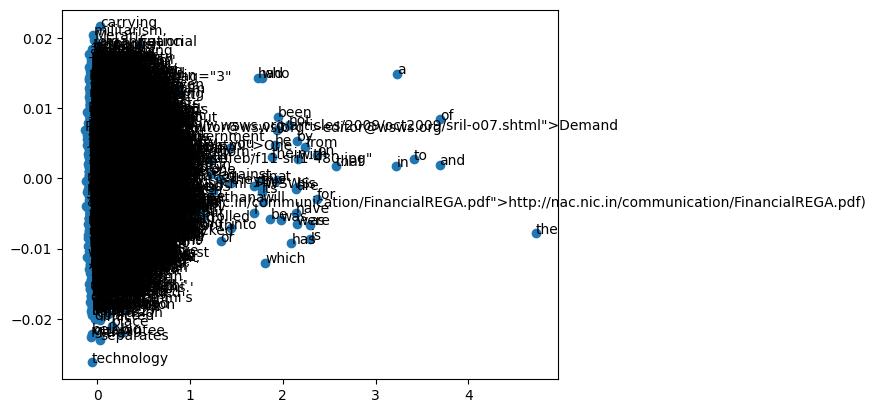

In [10]:
ownWordModel(engSentence,"engmodel.bin")

Word2Vec<vocab=9882, vector_size=100, alpha=0.025>


C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2962 (\N{TAMIL LETTER O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Tamil natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2992 (\N{TAMIL LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3009 (\N{TAMIL VOWEL SIGN U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2990 (\N{TAMIL LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\cor

C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2954 (\N{TAMIL LETTER UU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3001 (\N{TAMIL LETTER HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2947 (\N{TAMIL SIGN VISARGA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3020 (\N{TAMIL VOWEL SIGN AU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


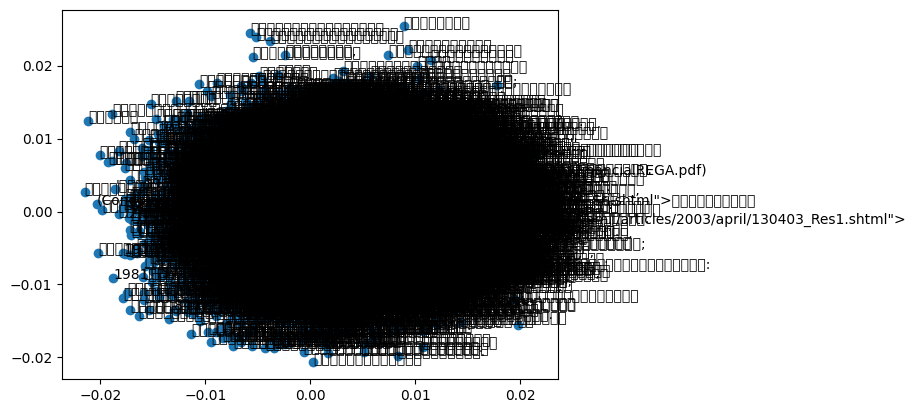

In [11]:
ownWordModel(tamSentence,"tammodel.bin")